In [12]:
import board
import busio
import digitalio
spi = busio.SPI(board.SCK, MOSI=board.MOSI, MISO=board.MISO)
cs = digitalio.DigitalInOut(board.CE1)
reset = digitalio.DigitalInOut(board.D25)

import adafruit_rfm9x
import time

rfm9x = adafruit_rfm9x.RFM9x(spi, cs, reset, 915.0)
print(rfm9x.ack_retries, rfm9x.spreading_factor, rfm9x.signal_bandwidth, rfm9x.bw_bins)
rfm9x.ack_retries = 0
rfm9x.spreading_factor = 7 
rfm9x.signal_bandwidth = 250000
rfm9x.enable_crc = False
print(rfm9x.ack_retries, rfm9x.spreading_factor, rfm9x.signal_bandwidth)

5 7 125000 (7800, 10400, 15600, 20800, 31250, 41700, 62500, 125000, 250000)
0 7 250000


In [13]:
packets = []

while True:
    packet = rfm9x.receive()
    received_time = time.time_ns()
    print("time: ", received_time)
    if packet is None:
        # Packet has not been received
        print("Received nothing! Listening again...")
    else:
        # Received a packet!
        print("Received (raw bytes): {0}".format(packet))
        try:
            packet_text = str(packet, "ascii")
            print("Received (ASCII): {0}".format(packet_text))
            rssi = rfm9x.last_rssi
            print("Received signal strength: {0} dB".format(rssi))
            packets.append([received_time, packet_text, rssi])
        except:
            print("error")


time:  1688400101447758333
Received (raw bytes): bytearray(b'2\r\n')
Received (ASCII): 2

Received signal strength: -80 dB
time:  1688400101530169663
Received (raw bytes): bytearray(b'5\r\n')
Received (ASCII): 5

Received signal strength: -53 dB
time:  1688400101676933795
Received (raw bytes): bytearray(b'5\r\n')
Received (ASCII): 5

Received signal strength: -52 dB
time:  1688400101731732332
Received (raw bytes): bytearray(b'3\r\n')
Received (ASCII): 3

Received signal strength: -51 dB
time:  1688400101792291302
Received (raw bytes): bytearray(b'3\r\n')
Received (ASCII): 3

Received signal strength: -51 dB
time:  1688400102188426039
Received (raw bytes): bytearray(b'2\r\n')
Received (ASCII): 2

Received signal strength: -81 dB
time:  1688400102221906671
Received (raw bytes): bytearray(b'3\r\n')
Received (ASCII): 3

Received signal strength: -52 dB
time:  1688400102263291037
Received (raw bytes): bytearray(b'4\r\n')
Received (ASCII): 4

Received signal strength: -53 dB
time:  168840010

KeyboardInterrupt: 

In [7]:
packets

[[1688398704242683475, '3\r\n', -52],
 [1688398704507182697, '2\r\n', -84],
 [1688398704560890463, '2\r\n', -84],
 [1688398704694620240, '3\r\n', -52],
 [1688398704906314817, '2\r\n', -84],
 [1688398704932137141, '3\r\n', -48],
 [1688398705067099559, '5\r\n', -52],
 [1688398705137344971, '2\r\n', -84],
 [1688398705352165463, '5\r\n', -53],
 [1688398705648187443, '4\r\n', -53],
 [1688398705875574041, '3\r\n', -53],
 [1688398705963316143, '2\r\n', -84],
 [1688398706174514077, '5\r\n', -53],
 [1688398706501745832, '5\r\n', -52],
 [1688398706559501375, '3\r\n', -52],
 [1688398706592228591, '4\r\n', -53],
 [1688398706844545095, '2\r\n', -84],
 [1688398706866603628, '4\r\n', -53],
 [1688398707203553743, '3\r\n', -52],
 [1688398707258913019, '2\r\n', -84],
 [1688398707366081694, '2\r\n', -84],
 [1688398707464208104, '4\r\n', -53],
 [1688398707509043115, '5\r\n', -52],
 [1688398707530133456, '2\r\n', -84],
 [1688398707719586157, '4\r\n', -53],
 [1688398707983103613, '5\r\n', -51],
 [1688398708

Beacon 2: average time difference = 647052927.12 ns
Beacon 5: average time difference = 598315962.4355644 ns
Beacon 3: average time difference = 608546300.7581301 ns
Beacon 4: average time difference = 634126050.028632 ns


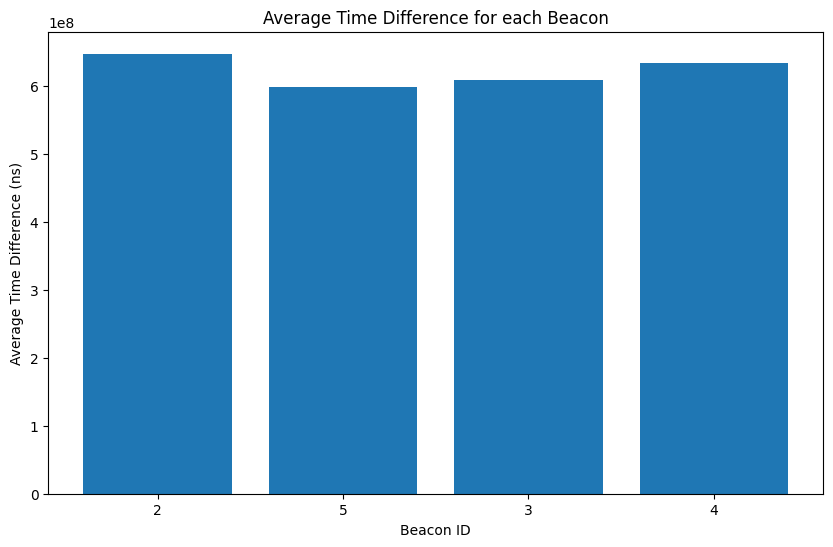

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

data = packets

# create a dictionary with default value as empty list
beacon_times = defaultdict(list)

# sort the data by time
data.sort(key=lambda x: x[0])

# loop through the data and populate the dictionary with time data for each beacon
for time, beacon_id, _ in data:
    beacon_times[beacon_id.strip()].append(time)

# create a dictionary to hold time differences for each beacon
beacon_diffs = defaultdict(list)

# calculate the time differences
for beacon, times in beacon_times.items():
    for i in range(1, len(times)):
        beacon_diffs[beacon].append(times[i] - times[i-1])

# calculate the average time difference for each beacon
average_diffs = {beacon: np.mean(diffs) for beacon, diffs in beacon_diffs.items()}

# print average differences
for beacon, avg_diff in average_diffs.items():
    print(f"Beacon {beacon}: average time difference = {avg_diff} ns")

# visualization
beacons = list(average_diffs.keys())
avg_diffs = list(average_diffs.values())

plt.figure(figsize=(10, 6))
plt.bar(beacons, avg_diffs)
plt.xlabel('Beacon ID')
plt.ylabel('Average Time Difference (ns)')
plt.title('Average Time Difference for each Beacon')
plt.show()


In [20]:
print("through put")
for i in range(len(avg_diffs)):
    print(10**9/(avg_diffs[i]*2))

through put
0.7727343143712754
0.835678857646803
0.8216301691047952
0.7884867684862087


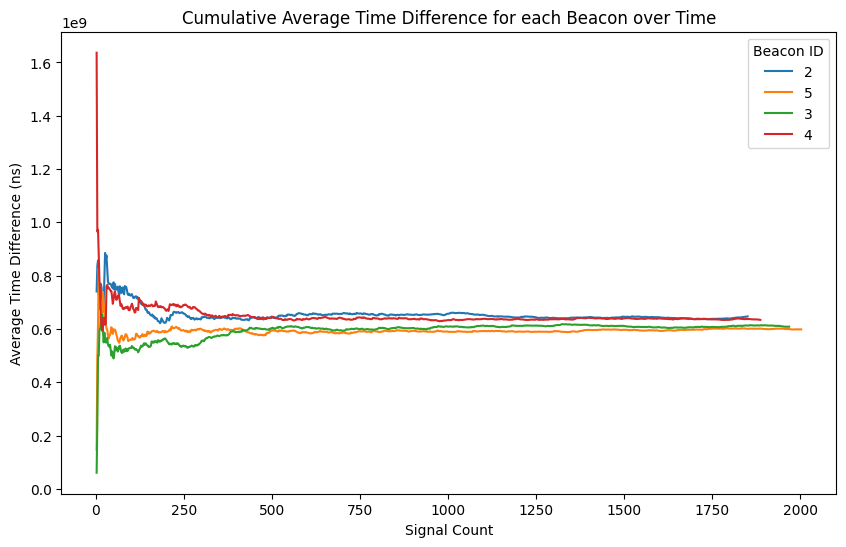

In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

data = packets

# create a dictionary with default value as empty list
beacon_times = defaultdict(list)

# sort the data by time
data.sort(key=lambda x: x[0])

# loop through the data and populate the dictionary with time data for each beacon
for time, beacon_id, _ in data:
    beacon_times[beacon_id.strip()].append(time)

# interval for averaging time differences
interval = 2

# calculate the cumulative average time difference for each beacon up to each interval
average_diffs_intervals = defaultdict(list)

for beacon, times in beacon_times.items():
    for i in range(interval, len(times)+1):
        time_diffs = [times[j] - times[j-1] for j in range(1, i)]
        average_diffs_intervals[beacon].append(np.mean(time_diffs))

# visualization
plt.figure(figsize=(10, 6))
for beacon, avg_diffs in average_diffs_intervals.items():
    plt.plot(range(interval, len(avg_diffs)*interval+1, interval), avg_diffs, label=beacon)

plt.xlabel('Signal Count')
plt.ylabel('Average Time Difference (ns)')
plt.title('Cumulative Average Time Difference for each Beacon over Time')
plt.legend(title='Beacon ID')
plt.show()


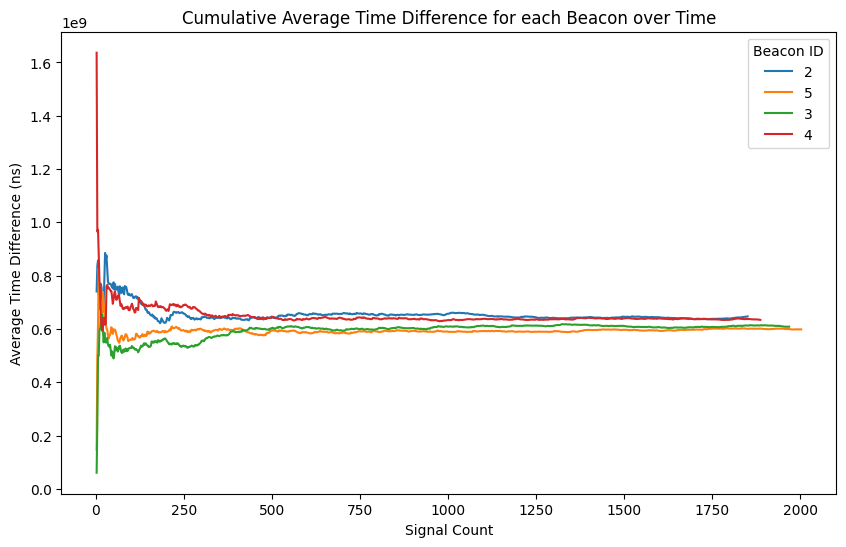

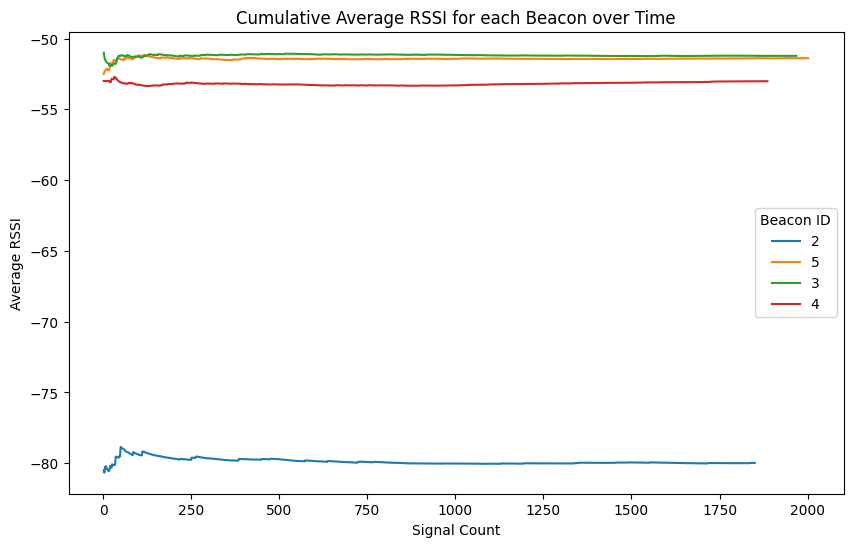

In [21]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

data = packets

# create a dictionary with default value as empty list
beacon_times = defaultdict(list)
beacon_rssis = defaultdict(list)

# sort the data by time
data.sort(key=lambda x: x[0])

# loop through the data and populate the dictionaries
for time, beacon_id, rssi in data:
    beacon_id = beacon_id.strip()
    beacon_times[beacon_id].append(time)
    beacon_rssis[beacon_id].append(rssi)

# interval for averaging time differences
interval = 2

# calculate the cumulative average time difference for each beacon up to each interval
average_diffs_intervals = defaultdict(list)
average_rssi_intervals = defaultdict(list)

for beacon, times in beacon_times.items():
    for i in range(interval, len(times)+1):
        time_diffs = [times[j] - times[j-1] for j in range(1, i)]
        average_diffs_intervals[beacon].append(np.mean(time_diffs))
        average_rssi_intervals[beacon].append(np.mean(beacon_rssis[beacon][:i]))

# visualization of average time difference
plt.figure(figsize=(10, 6))
for beacon, avg_diffs in average_diffs_intervals.items():
    plt.plot(range(interval, len(avg_diffs)*interval+1, interval), avg_diffs, label=beacon)
plt.xlabel('Signal Count')
plt.ylabel('Average Time Difference (ns)')
plt.title('Cumulative Average Time Difference for each Beacon over Time')
plt.legend(title='Beacon ID')
plt.show()

# visualization of average RSSI
plt.figure(figsize=(10, 6))
for beacon, avg_rssis in average_rssi_intervals.items():
    plt.plot(range(interval, len(avg_rssis)*interval+1, interval), avg_rssis, label=beacon)
plt.xlabel('Signal Count')
plt.ylabel('Average RSSI')
plt.title('Cumulative Average RSSI for each Beacon over Time')
plt.legend(title='Beacon ID')
plt.show()
